# Ui-Wing Cheah
## Module 8 Code

In [2]:
# getting imports
import numpy as np 
import scipy.stats as sp 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

### Problem 1
#### part (a) and (b)

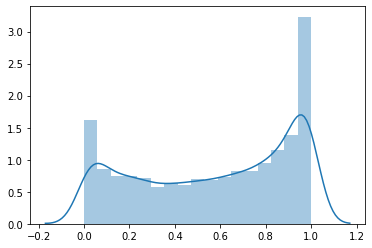

In [21]:
## run some supportcode for part (a) to see what kind of distribution results
nobs = 10000
sigma2 = 1
x = sp.norm.rvs(size=nobs,scale=sigma2,loc=0)
f_x = np.exp(-1*pow(x,2))

# 
f_x_bar = np.mean(f_x)

# let's plot f_x
ax_ = sns.distplot(f_x)


#### part (b)

In [29]:
sigmas= np.array([0.5,1,2,3,4])

f_bar = lambda sigmasq:1/np.sqrt(sigmasq*2+1)
def mc_int(sigma_,):
    nobs=10000
    x = sp.norm.rvs(size=nobs,scale=sigma_,loc=0)
    f_x = np.exp(-1*pow(x,2))
    f_x_barhat = np.mean(f_x)
    f_x_bar = f_bar(pow(sigma_,2))
    results = pd.Series({'analytical':f_x_bar,'empirical':f_x_barhat})
    return results

allResults = pd.DataFrame({sig_:mc_int(sig_) for sig_ in sigmas2})




In [30]:
allResults

,0.5,1.0,2.0,3.0,4.0
analytical,0.816497,0.577350,0.333333,0.229416,0.174078
empirical,0.813532,0.576711,0.329983,0.233527,0.170460


### Problem 2

In [70]:
f_dist = lambda x: 3.852985*np.exp(-pow(x,2)*np.sqrt(x))*pow(np.sin(x),2)

nobs = 10000
# we will create a few different x's
def trunc_norm(loc=0,scale=1,ndraws=100):
    d_count= 0
    draws = np.zeros(ndraws,)
    while d_count<ndraws:
        var_ = sp.norm.rvs(size=1,loc=loc,scale=scale)
        if var_> 0:
            draws[d_count]=var_
            d_count+=1
    return draws

x_lognorm =sp.lognorm.rvs(size=nobs,scale=1.0,s=1)
x_exp = sp.expon.rvs(loc=0,scale=1.,size=nobs)
x_tnorm = trunc_norm(ndraws=nobs)
f_dist_bar = pd.Series({'lognorm':np.mean(f_dist(x_lognorm)),'exp':np.mean(f_dist(x_exp)),'tnorm':np.mean(f_dist(x_tnorm))})
f_dist_var = pd.Series({'lognorm':np.var(f_dist(x_lognorm)),'exp':np.var(f_dist(x_exp)),'tnorm':np.var(f_dist(x_tnorm))})


In [71]:
f_dist_bar

lognorm    0.454862
exp        0.437592
tnorm      0.527315
dtype: float64

In [72]:
f_dist_var

lognorm    0.172488
exp        0.165899
tnorm      0.161518
dtype: float64

In [43]:
x_lognorm

array([0.4009929 , 2.47739413, 0.97773791, ..., 1.34358394, 0.42776781,
       0.63142632])

In [45]:
sp.expon?

Signature:       sp.expon(*args, **kwds)
Type:            expon_gen
String form:     <scipy.stats._continuous_distns.expon_gen object at 0x0000023A1A960748>
File:            c:\users\nowuc\anaconda3\envs\research\lib\site-packages\scipy\stats\_continuous_distns.py
Docstring:      
An exponential continuous random variable.

As an instance of the `rv_continuous` class, `expon` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, loc=0, scale=1)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate